In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

1. Create data and implement PCA algorithm then visualize each step like the below figure.

2. Implement PCA algorithm to reduce dimension (2D) of iris dataset (https://archive.ics.uci.edu/ml/datasets/iris), then visualize the result.

In [2]:
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",
                   names=['sepal length','sepal width','petal length','petal width','target'])
data.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
def PCA(X , num_components):  
    #Mean centering the data 
    X_meaned = np.mean(X , axis = 0) - X
     
    #Calculating the covariance matrix of the mean-centered data.
    cov_mat = np.cov(X_meaned , rowvar = False)
     
    #Calculating Eigenvalues and Eigenvectors of the covariance matrix
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
     
    #Sort the eigenvalues in descending order
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]

    #Similarly sort the eigenvectors 
    sorted_eigenvectors = eigen_vectors[:,sorted_index]
     
    #Select a subset from the rearranged Eigenvalue matrix
    eigenvector_subset = sorted_eigenvectors[:,0:num_components]
     
    #Transform the data 
    X_reduced = np.dot(eigenvector_subset.transpose() , X_meaned.transpose() ).transpose()
     
    return X_reduced

In [4]:
x = data.iloc[:,0:4]
target = data.iloc[:,4]

In [5]:
#Applying it to PCA function
mat_reduced = PCA(x , 2)

In [6]:
#Creating a Pandas DataFrame of reduced Dataset
principal_df = pd.DataFrame(mat_reduced , columns = ['Principal Component 1','Principal Component2'])
 
#Concat it with target variable to create a complete Dataset
principal_df = pd.concat([principal_df , pd.DataFrame(target)] , axis = 1)

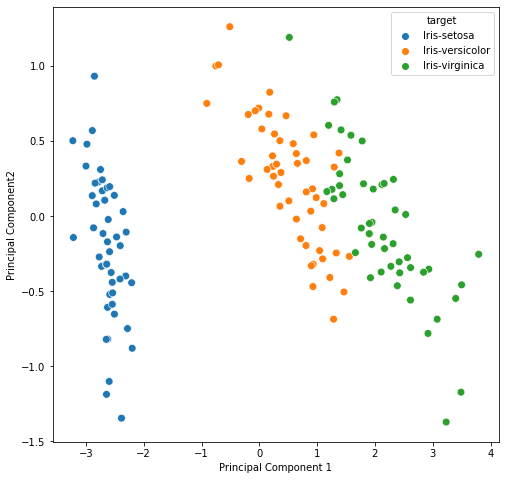

In [7]:
plt.figure(figsize = (8,8))
sb.scatterplot(data = principal_df , x = 'Principal Component 1',y = 'Principal Component2' , hue = 'target' , s = 60)

3. Use PCA in sklearn to iris dataset and compare the result with the question 2.

In [8]:
from sklearn.preprocessing import StandardScaler
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
x = data.loc[:, features].values
y = data.loc[:,['target']].values

x = StandardScaler().fit_transform(x)

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principal_data = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [10]:
final_data = pd.concat([principal_data, data[['target']]], axis = 1)

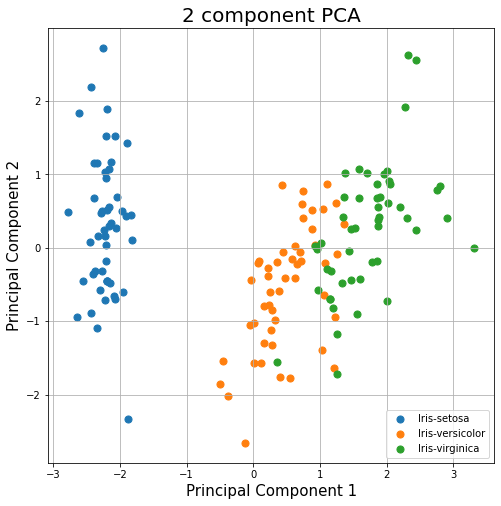

In [11]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['b', 'o', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = final_data['target'] == target
    ax.scatter(final_data.loc[indicesToKeep, 'principal component 1']
               , final_data.loc[indicesToKeep, 'principal component 2']       
               , s = 50)
ax.legend(targets)
ax.grid()